# Project Description: Image Denoising with Autoencoders

In this project, I implemented various types of autoencoders using TensorFlow and Keras to perform image denoising tasks on the MNIST dataset. Autoencoders are a class of neural networks widely used for unsupervised learning tasks, particularly for dimensionality reduction and feature learning.



1. Simple Autoencoder:

I began by creating a simple autoencoder using densely connected layers. This autoencoder consists of an input layer, an encoding layer, and a decoding layer. The model is trained to compress and then reconstruct the input images. The architecture includes:

- Input layer with 784 nodes (28x28 pixels)
- Encoding layer with 32 nodes
- Decoding layer with 784 nodes
- Utilized the relu activation function for encoding and sigmoid activation for decoding
- Trained the model using binary cross-entropy loss and the Adam optimizer


2. Convolutional Autoencoder:

Following the simple autoencoder, I implemented a convolutional autoencoder, which is more suitable for image data due to its ability to capture spatial dependencies. This architecture comprises convolutional and upsampling layers for both encoding and decoding. Key features include:

- Input images of shape (28, 28, 1)
- Encoder with convolutional layers followed by max-pooling to reduce dimensions
- Decoder with upsampling layers to upsample the encoded representation
- Final layer with a sigmoid activation function to produce the output image
- Training was conducted using binary cross-entropy loss and the Adam optimizer



3. Application to Image Denoising:

To demonstrate the practical utility of autoencoders, I applied them to denoise images corrupted with Gaussian noise. Here's how the process unfolds:

- Added Gaussian noise to the MNIST images
- Trained a convolutional autoencoder to reconstruct the clean images from the noisy inputs
- The model was trained using the noisy images as inputs and the clean images as targets
- Upon training completion, the autoencoder effectively denoised the input images, producing clear reconstructions

This project showcases the versatility of autoencoders in various image processing tasks, from simple compression and reconstruction to more sophisticated applications like denoising. The implemented models offer insights into the power of deep learning techniques for image restoration and enhancement.


# Autoencoder MNIST (Handwritten Digits)

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

# This is the size of the encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Version autoencoder simple

In [2]:
# Using functional API
# Define input layer for the images
input_img = keras.Input(shape=(784,))
# Encode the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# Decode the encoded input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(inputs=input_img, outputs=decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [3]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Create a decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# Train the autoencoder

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 2/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 3/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 5/30
235/235 [==============================] - 2s 6ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 6/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 7/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 8/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 9/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0924 - val_loss: 0.0914
Epoch 10/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0924 - val_loss: 0.0913

In [10]:
# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

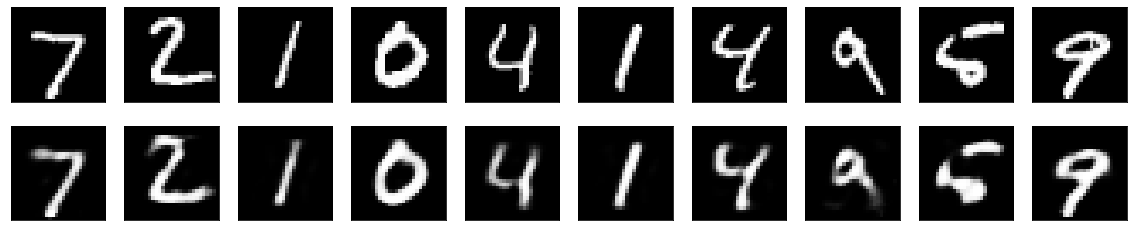

In [11]:
# Visualize original and reconstructed images
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convolutional autoencoder

In [34]:
# Define input layer for the images
input_img = keras.Input(shape=(28, 28, 1))

# Encoder layers
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [35]:
# Create a autoencoder model
autoencoder2 = keras.Model(input_img, decoded)

autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder2.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 8)           0   

In [36]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [37]:
# Train the autoencoder
autoencoder2.fit(x_train, x_train,
                epochs=30,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
469/469 [==============================] - 59s 123ms/step - loss: 0.2071 - val_loss: 0.1416
Epoch 2/30
469/469 [==============================] - 57s 122ms/step - loss: 0.1324 - val_loss: 0.1237
Epoch 3/30
469/469 [==============================] - 59s 126ms/step - loss: 0.1206 - val_loss: 0.1157
Epoch 4/30
469/469 [==============================] - 58s 124ms/step - loss: 0.1145 - val_loss: 0.1109
Epoch 5/30
469/469 [==============================] - 58s 124ms/step - loss: 0.1106 - val_loss: 0.1082
Epoch 6/30
469/469 [==============================] - 60s 129ms/step - loss: 0.1078 - val_loss: 0.1053
Epoch 7/30
469/469 [==============================] - 59s 125ms/step - loss: 0.1057 - val_loss: 0.1038
Epoch 8/30
469/469 [==============================] - 57s 123ms/step - loss: 0.1042 - val_loss: 0.1022
Epoch 9/30
469/469 [==============================] - 59s 126ms/step - loss: 0.1029 - val_loss: 0.1008
Epoch 10/30
469/469 [==============================] - 58s 123ms/step - l

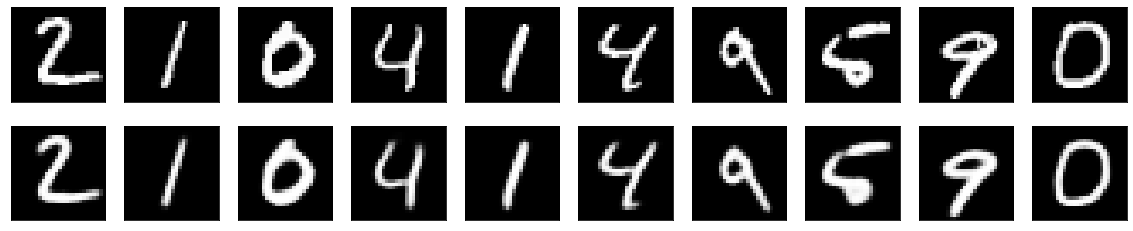

In [38]:
# Visualize original and reconstructed images
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original images
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

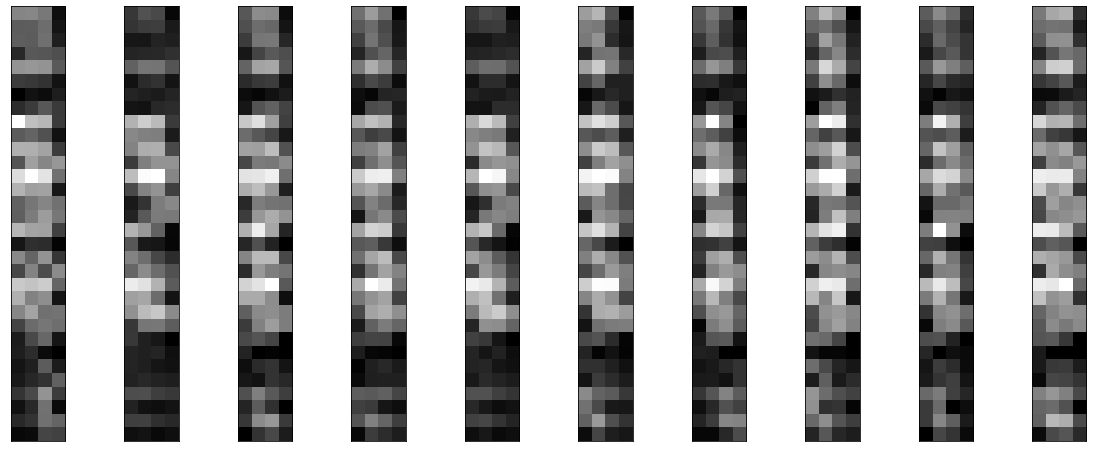

In [39]:
#128-dimensional encoded representations. 
#These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images.
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to image denoising

In [27]:
# Add noise to the dataset
noise_factor = 0.5

# Add Gaussian noise to the training and test sets
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Clip the pixel values to ensure they are within the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

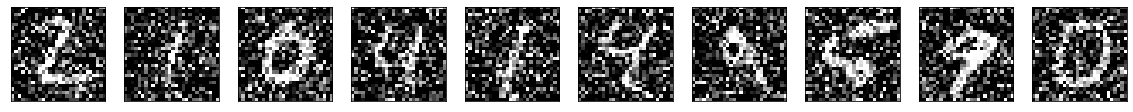

In [28]:
# Visualize noisy images
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [29]:
# Define input layer for the images
input_img = keras.Input(shape=(28, 28, 1))

# Encoder layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 32)        0   

In [31]:
# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
                )

Epoch 1/50
469/469 [==============================] - 88s 187ms/step - loss: 0.1268 - val_loss: 0.1137
Epoch 2/50
469/469 [==============================] - 88s 188ms/step - loss: 0.1110 - val_loss: 0.1082
Epoch 3/50
469/469 [==============================] - 88s 188ms/step - loss: 0.1068 - val_loss: 0.1045
Epoch 4/50
469/469 [==============================] - 89s 189ms/step - loss: 0.1044 - val_loss: 0.1032
Epoch 5/50
469/469 [==============================] - 87s 186ms/step - loss: 0.1028 - val_loss: 0.1013
Epoch 6/50
469/469 [==============================] - 88s 187ms/step - loss: 0.1014 - val_loss: 0.1001
Epoch 7/50
469/469 [==============================] - 91s 195ms/step - loss: 0.1004 - val_loss: 0.0991
Epoch 8/50
469/469 [==============================] - 91s 193ms/step - loss: 0.0996 - val_loss: 0.0984
Epoch 9/50
469/469 [==============================] - 88s 187ms/step - loss: 0.0988 - val_loss: 0.0976
Epoch 10/50
469/469 [==============================] - 88s 188ms/step - l

2022-02-16 16:10:41.448863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


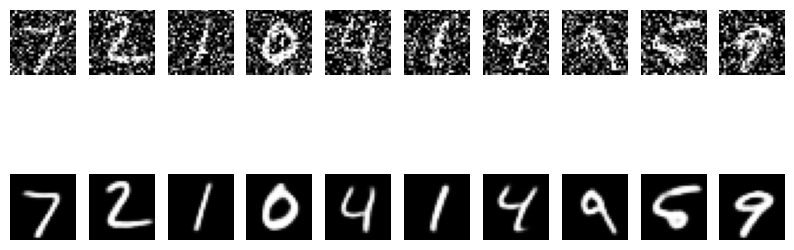

In [40]:
# Visualize noisy and reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
    # display noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

    # display reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.set_axis_off()

plt.show()
